# Capstone Project

### Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data

In [ ]:
df = pd.read_csv("covid_sample.csv")

In [3]:
df.head()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2023/01/02,2023/01/10,NaN,2023/01/02,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes
1,2023/01/02,2023/01/04,2023/01/04,2023/01/02,Probable Case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,No,Missing
2,2023/01/02,2023/01/02,NaN,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing
3,2023/01/02,2023/01/11,2023/01/02,NaN,Probable Case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
4,2023/01/02,2023/01/04,2023/01/02,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Unknown


## 1. Data Cleaning

### Create a column Race.

In [4]:
df['Race'] = df['race_ethnicity_combined'].str.split(',').str[0]
df.head()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,Race
0,2023/01/02,2023/01/10,NaN,2023/01/02,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No,No,Yes,Black
1,2023/01/02,2023/01/04,2023/01/04,2023/01/02,Probable Case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Missing,No,Missing,Black
2,2023/01/02,2023/01/02,NaN,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Missing,Black
3,2023/01/02,2023/01/11,2023/01/02,NaN,Probable Case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing,Black
4,2023/01/02,2023/01/04,2023/01/02,NaN,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",Missing,Missing,Missing,Unknown,Black


### Create a new dataframe with current_status, sex, age_group, Race, hosp_yn, icu_yn, death_yn, medcond_yn columns as the variables.

In [5]:
new_df = df[['current_status', 'sex', 'age_group', 'Race', 'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn']]
new_df.head()

,current_status,sex,age_group,Race,hosp_yn,icu_yn,death_yn,medcond_yn
0,Laboratory-confirmed case,Male,10 - 19 Years,Black,No,No,No,Yes
1,Probable Case,Male,10 - 19 Years,Black,No,Missing,No,Missing
2,Laboratory-confirmed case,Male,10 - 19 Years,Black,Missing,Missing,Missing,Missing
3,Probable Case,Male,10 - 19 Years,Black,Missing,Missing,No,Missing
4,Laboratory-confirmed case,Male,10 - 19 Years,Black,Missing,Missing,Missing,Unknown


### Your new dataset has a lot of Missing and Unknown labels in all the columns. Assume these are missing values, replace all Missing and Unknown labels in the dataset with NaN values. After replacing, drop all NaN values from the dataset. Note: The total rows of your dataset should be approx. 29,727 after cleaning.

In [6]:
# Replace Missing and Unknown labels with NaN
new_df.replace(['Missing', 'Unknown'], np.nan, inplace=True)

# Drop rows with NaN values
new_df.dropna(inplace=True)

C:\Users\nandi\AppData\Local\Temp\ipykernel_12012\1543526938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.replace(['Missing', 'Unknown'], np.nan, inplace=True)
C:\Users\nandi\AppData\Local\Temp\ipykernel_12012\1543526938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace=True)


In [7]:
new_df

,current_status,sex,age_group,Race,hosp_yn,icu_yn,death_yn,medcond_yn
0,Laboratory-confirmed case,Male,10 - 19 Years,Black,No,No,No,Yes
76,Probable Case,Male,10 - 19 Years,Black,No,No,No,Yes
107,Probable Case,Male,10 - 19 Years,Black,No,No,No,Yes
312,Laboratory-confirmed case,Male,20 - 29 Years,Hispanic/Latino,No,No,No,Yes
749,Laboratory-confirmed case,Male,40 - 49 Years,White,No,No,No,Yes
...,...,...,...,...,...,...,...,...
4662509,Laboratory-confirmed case,Female,50 - 59 Years,White,No,No,No,No
4662530,Probable Case,Female,50 - 59 Years,White,No,No,No,No
4662913,Laboratory-confirmed case,Female,50 - 59 Years,White,No,No,No,Yes
4663109,Probable Case,Female,50 - 59 Years,White,No,No,No,No


## 2. Data Visualization

### Create a countplot for the age_group column with sex column as the hue.

<Axes: xlabel='age_group', ylabel='count'>

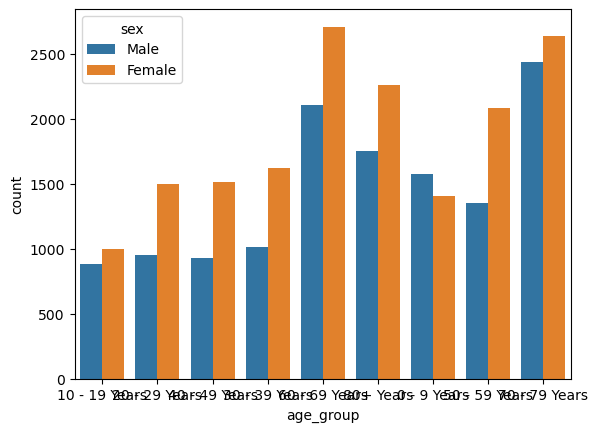

In [8]:
sns.countplot(data=new_df, x='age_group', hue='sex')

### Create a countplot for the death_yn column with age_group column as the hue.

<Axes: xlabel='death_yn', ylabel='count'>

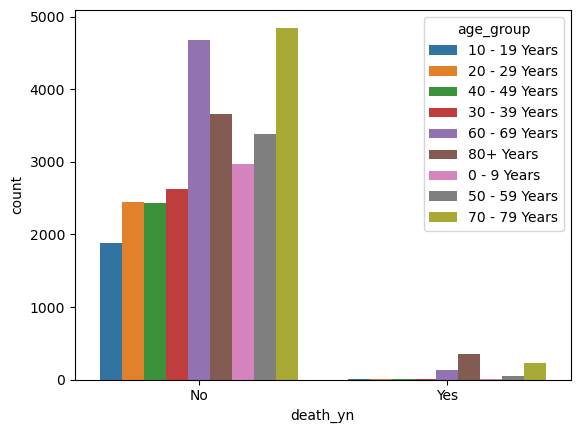

In [9]:
sns.countplot(data=new_df, x='death_yn', hue='age_group')

### Create a countplot for the medcond_yn column with age_group column as the hue.

<Axes: xlabel='medcond_yn', ylabel='count'>

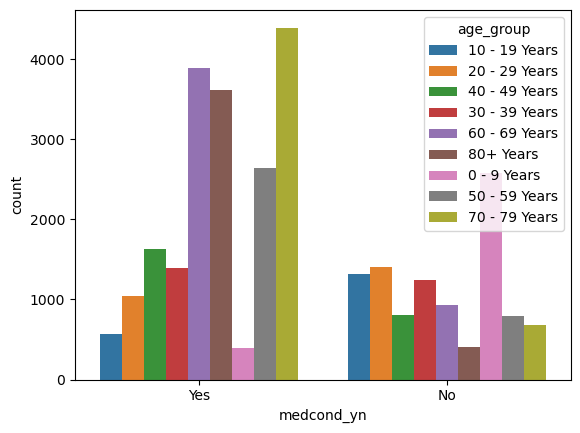

In [10]:
sns.countplot(data=new_df, x='medcond_yn', hue='age_group')

### Encode the categorical values using the LabelEncoder() module. Create a heatmap of the correlation between the columns (features).

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
le = LabelEncoder()

In [13]:
encoded = new_df.apply(le.fit_transform)

In [14]:
corr_matrix = encoded.corr()

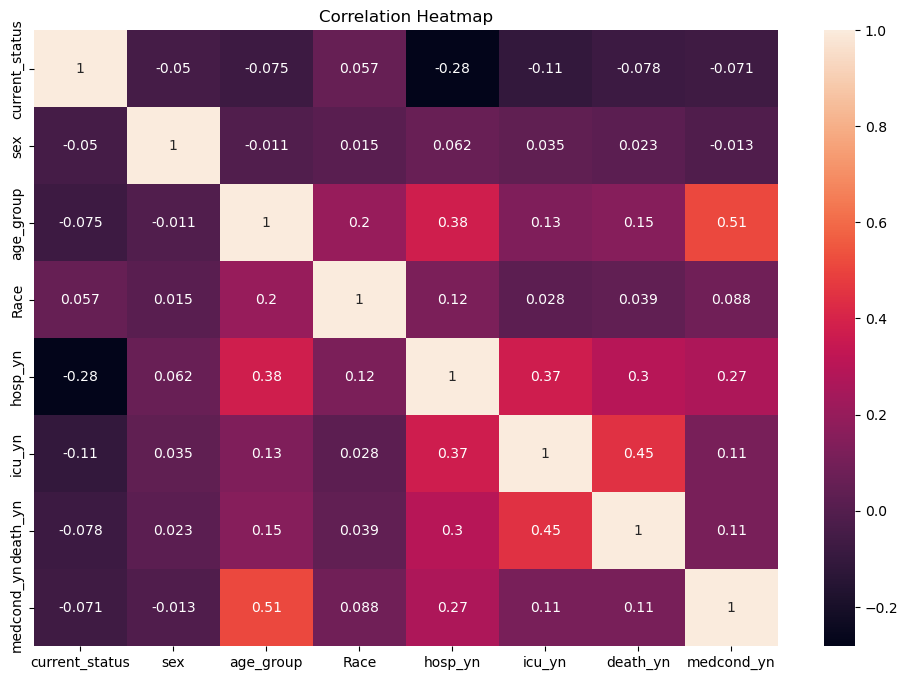

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

## 3. Training and Prediction

### Separate the Target(death_yn column) as y from the predictors (Remaining columns) as X.

In [16]:
X = new_df.drop('death_yn',axis=1)#Predictors
y = new_df['death_yn']#Target

### Using the train_test_split module, split the data into 80% training set and 20% test set. Use a random_state seed of 42.

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [18]:
#80% reserved for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Logistic Regression with a random_state seed of 42.

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoders = {}
for column in X_train.columns:
    if X_train[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        X_train[column] = label_encoders[column].fit_transform(X_train[column])
        X_test[column] = label_encoders[column].transform(X_test[column])

In [21]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state = 42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

# Use the weighted Average of Precision, Recall, and F1-Score to compare the performance of the model. Note: No tuning of parameters is required, train the model with the default parameters.

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
report = classification_report(y_test, y_pred, output_dict=True)
weighted_avg_precision = report['weighted avg']['precision']
weighted_avg_recall = report['weighted avg']['recall']
weighted_avg_f1_score = report['weighted avg']['f1-score']

print("Weighted Average Precision:", weighted_avg_precision)
print("Weighted Average Recall:", weighted_avg_recall)
print("Weighted Average F1-Score:", weighted_avg_f1_score)

Weighted Average Precision: 0.96661054728569
Weighted Average Recall: 0.9752774974772956
Weighted Average F1-Score: 0.9692281374485006


# Perform a Logistic Regression with a random_state seed of 42 and a 10-fold cross-validation, using the following range of parameters:

In [27]:
# Penalty Type
penalty = ['l1', 'l2']
solver = ['sag', 'saga', 'lbfgs', 'liblinear']
# logarithmically spaced C values 
C = np.logspace(0, 4, 10)

In [28]:
grid_model = GridSearchCV(lr_model,param_grid={'C':C,'penalty':penalty})

In [29]:
grid_model.fit(X_train,y_train)

C:\Users\nandi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nandi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nandi\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\nandi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = 

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [30]:
grid_model.best_params_

{'C': 166.81005372000593, 'penalty': 'l2'}

# Report the best parameters for the model

In [31]:
print("Best Parameters:", lr_model.get_params())

Best Parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


### Get the Confusion Matrix Plot for the model

In [32]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [33]:
y_pred = grid_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9752774974772956

In [34]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[5779,   27],
       [ 120,   20]], dtype=int64)

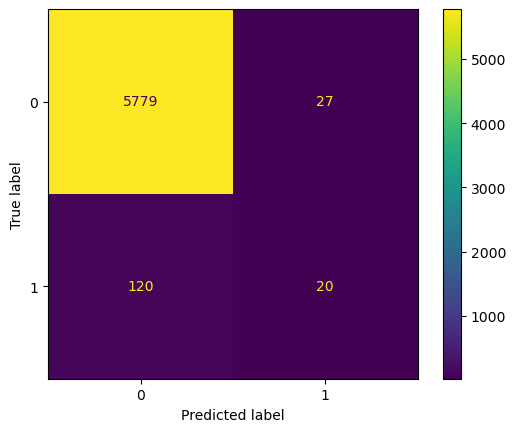

In [35]:
#Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Use the weighted Average of Precision, Recall and F1-Score to compare the performance of the model.

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.98      1.00      0.99      5806
         Yes       0.43      0.14      0.21       140

    accuracy                           0.98      5946
   macro avg       0.70      0.57      0.60      5946
weighted avg       0.97      0.98      0.97      5946



### Compare the performance of the default model with the optimized model.

In [47]:
# Use the weighted Average of Precision, Recall, and F1-Score to compare the performance of the optimized model.
print("Optimized Model - Weighted Average Precision:", report['weighted avg']['precision'])
print("Optimized Model - Weighted Average Recall:", report['weighted avg']['recall'])
print("Optimized Model - Weighted Average F1-Score:", report['weighted avg']['f1-score'])


Optimized Model - Weighted Average Precision: 0.96661054728569
Optimized Model - Weighted Average Recall: 0.9752774974772956
Optimized Model - Weighted Average F1-Score: 0.9692281374485006


In [46]:
# Compare the performance of the default model with the optimized model.
print("Comparison:")
print("Default Model - Weighted Average Precision:", weighted_avg_precision)
print("Default Model - Weighted Average Recall:", weighted_avg_recall)
print("Default Model - Weighted Average F1-Score:", weighted_avg_f1_score)
print(" ")
print("Optimized Model - Weighted Average Precision:", report['weighted avg']['precision'])
print("Optimized Model - Weighted Average Recall:", report['weighted avg']['recall'])
print("Optimized Model - Weighted Average F1-Score:", report['weighted avg']['f1-score'])

Comparison:
Default Model - Weighted Average Precision: 0.96661054728569
Default Model - Weighted Average Recall: 0.9752774974772956
Default Model - Weighted Average F1-Score: 0.9692281374485006
 
Optimized Model - Weighted Average Precision: 0.96661054728569
Optimized Model - Weighted Average Recall: 0.9752774974772956
Optimized Model - Weighted Average F1-Score: 0.9692281374485006


# Interpretation:

Based on the values we got for our weighted average Precision, Recall, and F1-Score we can include that 96% of the instances where the model predicted yes for death_yn were correct, 97% of the instances where the model predicted no for death_yn were correct, and there was a 96% balance between the two. Because of this it can be concluded that the model did well.